# WALK	: Web Archives for Longitudinal Research

"WALK will enable present and future humanities and social science scholars to access, interpret and curate born-digital primary resources that document our recent past."

This is a demo/tutorial for the **University of Alberta** on our up-to-now explorations on Web Archives.

Over the summer, I have had the pleasure of working with Dr. Ian Milligan and Nick Ruest, building a tool for conducting analytics on the Web Archive collections. This has involved working with [Warcbase](http://lintool.github.io/warcbase-docs/) in order to extract important data from the collections and using Python including the pandas / numpy libraries via Anaconda, a framework intended for analytics-style work.

I have called this tool / library *Compare* because it uses Warcbase derivative data from the archives / WARC files.

Compare uses Multiple Correspondence Analysis (MCA) to explore relationships among different collections of data. It is like factor analysis.  I have a demo of MCA [using parliamentary committees and MPs as a sample.](https://github.com/web-archive-group/WALK/blob/master/Scripts/compare_collection/UnderstandingMCA.ipynb). 


In [1]:
#First let's import the necessary libraries.
%matplotlib inline
from Compare import Compare # The Compare class
import os #file operations
from collections import defaultdict #complex dictionaries
import matplotlib.pyplot as plt #plotting library
from mpl_toolkits.mplot3d import Axes3D #for 3d graphs
import copy #need deepcopy() for working with the dictionaries.

####   Uncomment the items below if you want 
####   to use D3 for output.

#import mpld3
#mpld3.enable_notebook()


While many questions could be answered using MCA, we have decided to focus on a simple problem statement: ***Can we conduct an evaluation of a collection of web archives using data analytics?*** For this demo, I have included a number of items:

- Two 'dummy' collections (HUMANITIES COMPUTING & UNIVERSITY OF TORONTO T-SPACE)
- Two 'external' collections (Canadian Political Parties & UVIC environmental organizations)
- Three Twitter crawls.
- University of Alberta collections (13 in all)

While there are a number of ways we could compare the collections, this example will use web domain names (urls). Often MCA tries to compare both factors (collections *and* urls) but including the urls would be too difficult to see.  The urls will be represented by off-white squares and no labels to keep them from confusing the analysis.

We assume that libraries will continue not to count format as a selection criteria, meaning that web archives are selected on the same criteria as books, journals or any other source. We have decided to focus on the following principles of collection management, however:

- Coverage / Scope
-- What are the best ways to evaluate coverage?
- Accuracy
-- Can we detect problems (eg. ineffective crawls)
- Relevance
-- Is a historian likely to find something unique or interesting in the collection?
- Dynamics
-- How has the collection changed from crawl to crawl?


In [10]:
# The output below takes the derivative files from the folder "assembled/" and puts them into a python dictionary (array)
# for later use.  I have included two of these. One including the Heritage Community Foundation's collection and one
# not.

path = "assembled/"

def processCollection (path):
    #initialise vars:
    urls = []
    #establish the data folder
    for filename in os.listdir(path):
        with open(path+filename, "r") as file:
            print (filename) #see the filenames available.
            #print(urls[1])
            urls.append(list({(filename[0:10], line.translate(str.maketrans(')'," ")).split(",")[0][2:6], line.translate(str.maketrans(')'," ")).split(",")[1].strip()) for line in file.readlines()}))
    return(urls)

#newdict = defaultdict(dict)
newdict = defaultdict(lambda: defaultdict(list))
newdict2 = defaultdict(lambda: defaultdict(list))
PC = processCollection(path)
#print(list(zip(PC[0])))
#print(list(zip(PC[0][0])))
#print (**collect)
for collect in PC:
    for coll, date, url in collect:
        if coll == 'DUMMY_SOCI' or coll == 'DUMMY_GOVE' or coll == 'DUMMY_MEDI' or coll == 'DUMMY_TECH' or coll == 'DUMMY_OVER' or coll == 'DUMMY_ORGA':
            pass
        else:
            newdict[date][coll].append(url)
        
for collect in PC:
    for coll, date, url in collect:
        if coll == 'HCF_ENCYCL' or coll == 'HERITAGE_C' or coll == 'DUMMY_SOCI' or coll == 'DUMMY_GOVE' or coll == 'DUMMY_MEDI' or coll == 'DUMMY_TECH' or coll == 'DUMMY_OVER' or coll == 'DUMMY_ORGA':
            pass
        else:
            newdict2[date][coll].append(url)

# newdict will provide all the data
# newdict2 will show data without the HCF_ENCYCLOPEDIA or HERITAGE COMMUNITY as these are unique collections (see below).
 

EDUCATION_CURRICULUM
HEALTH_SCIENCES_GREY
TWITTER_ymm_fire
HUMANITIES_DUMMY
IDLENOMORE
HERITAGE_COMMUNITY
OTTAWA_SHOOTING
UVIC_environmental_organizations_and_resources_of_bc-urls.txt
TWITTER_panamapapers
TWITTER_elxn42
PRAIRIE_PROVINCES
TORONTO_CPP
DUMMY_OVERALL
FLOODS_2013
FRANCOPHONIE_DE_LOUEST
HCF_ENCYCLOPEDIA
OIL_SANDS
ENERGY_ENV
WEBARCHIVE_GENERAL
DUMMY_GOVERNMENT
BUSINESS_GREY_LIT
DUMMY_TECHNOLOGY_SITES
DUMMY_ORGANIZATION
DUMMY_MEDIA
TORONTO_tspace-urls.txt
DUMMY_SOCIALMEDIA


In [11]:
## Produce a dictionary output that creates a list of outputs suitable for analysis by date.
##
## collection_var[-1] would analyze all the links together until the latest year (2016). collection_var[-2]
## would analyze everything up to t-1 (2015).
##
## Our hope for the future is that the data could be used in an animation, showing changes over time. But for now, 
## we will just show the progress.

def add_two_collections (col1, col2):
    # This takes two collections and combines them.
    col_1 = col1.copy()
    for coll, values in col2.items():
        #print(values)
        try:
            col_1[coll] = set(col_1[coll])
            col_1[coll].update(set(values)) 
            col_1[coll] = list(col_1[coll])
        except KeyError:
            col_1[coll] = list(values)       
    return col_1

def reduce_collections (dictionary):
    dict_list = []
    fulllist = {}
    dict2 = copy.deepcopy(dictionary)
    for x, y in sorted(dict2.items()):
        #print(x)
        n = dictionary.pop(x)
        if len(dict_list) < 1:
            dict_list.append(n)
        #print(n)
        else:
            dict_list.append((add_two_collections(dict_list[-1], n)))
        #print(dict_list)
    return(dict_list)

collection_var = reduce_collections (copy.deepcopy(newdict))
collection_var2 = reduce_collections (copy.deepcopy(newdict2))

First we will start with the earliest date (2011). Six collections have data listed for these dates.

- Health Sciences Grey Lit
- Prairie Provinces
- Heritage Community Foundation
- Heritage Community Foundation Encyclopedia
- Alberta Education
- Web Archive General

The set of numbers released refers to the four dimensions of analysis possible (n-2 of the factor with the fewest entities).  The most important factor (horizontal) accounts for 69% of the variation in the graph. This suggests that the Heritage Community Foundation collections are unique compared to the others. The second factor, accounting for 24.8% of the variation in the graph, separates the Health Sciences grey literature from the education, prairie provinces and web archive. 

['HCF_ENCYCL', 'WEBARCHIVE', 'HEALTH_SCI', 'HERITAGE_C', 'EDUCATION_', 'PRAIRIE_PR']
[ 0.68950133  0.24750168  0.14032739  0.00103307]


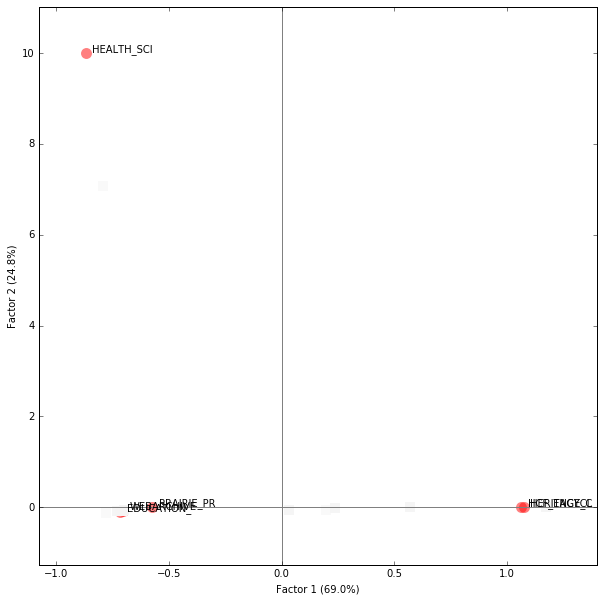

In [12]:
Compare(collection_var[-5])

After examining the graphs across all years we've established that the Heritage Community Foundation collections are pretty unique in terms of common links. The below graph shows the graph for all the website links cumulative to 2016.  The factor difference across the horizontal line grew from about 1 to between 6 & 8. These values are related to Chi-squared distance and reflect how much the HCF collection is different from the rest of the crowd. 

There is also another factor, again accounting for about 26 % of the differences showing a spectrum between the panama papers and energy and the environment. Unfortunately, the HCF factors are obscuring the differences among the other collections.

Since we have more collections involved in the analysis this time, we have many more factors with the potential for analysis. It would be nice to see what the third factor (accounting for 15.2% of the difference) shows about the collection.

['TWITTER_pa', 'ENERGY_ENV', 'OTTAWA_SHO', 'EDUCATION_', 'HUMANITIES', 'UVIC_envir', 'TORONTO_CP', 'WEBARCHIVE', 'IDLENOMORE', 'TORONTO_ts', 'FLOODS_201', 'TWITTER_el', 'OIL_SANDS', 'FRANCOPHON', 'HEALTH_SCI', 'TWITTER_ym', 'BUSINESS_G', 'PRAIRIE_PR', 'HCF_ENCYCL', 'HERITAGE_C']
[ 0.54005097  0.26434114  0.15230647  0.12275117  0.09696571  0.08822895
  0.08497294  0.08368571  0.07894521  0.06204034  0.0591887   0.04768065
  0.04363982  0.04213638  0.03965712  0.03866485  0.03397134  0.03223251
  0.00139393]


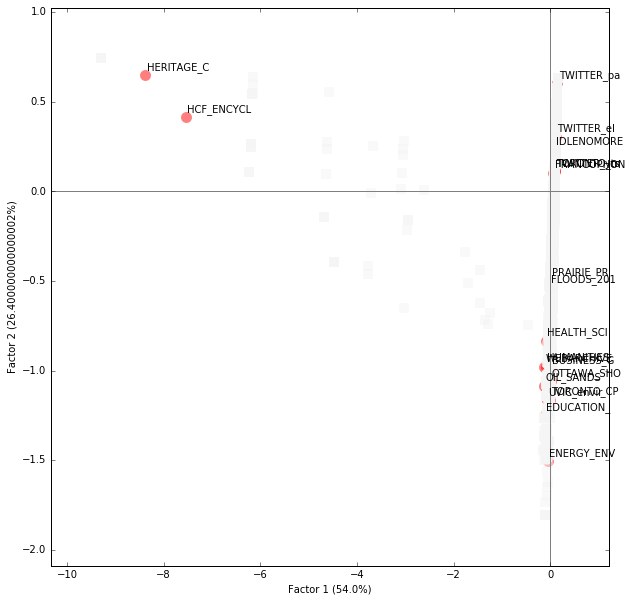

In [14]:
Compare(collection_var[-1])

If we select just 3 of the elements for collection_var, we can see a venn diagram showing the precise number of links they have in common - just 6 all together. In general, we can see that the HCF collections have more links in common with each other than with the other collections. They are quite unique compared to the other sources.

Links that all collections have in common: 

www.adobe.com, library.usask.ca, www.macromedia.com, get.adobe.com, www.albertasource.ca



Links that the HCF collections have in common: 

www.scs.sk.ca, www.law.umkc.edu, www.lubiconsolidarity.ca, epe.lac-bac.gc.ca, www.jasper.travel, www.virtualmuseum.ca, www.legacymagazine.ab.ca, www.pc.gc.ca, tpr.alberta.ca, www.uwgb.edu, www.schoolnet.ca, audio.gockua.com, www.plateaupress.com, www.youthsource.ab.ca, www.kenmcgoogan.com, www.oilersheritage.com, www3.bc.sympatico.ca, collection.nlc-bnc.ca, www.nps.gov, www.telusplanet.net, www.csc-scc.gc.ca, collections.ic.gc.ca, www.whitepinepictures.com, www.whiteoak.org, www.metismuseum.ca, www.tvdsb.on.ca, activex.microsoft.com, www.real.com, 66.244.199.219, www.nlc-bnc.ca, kenmcgoogan.blogspot.com, www.cd.gov.ab.ca, www.atlascoalmine.ab.ca, www.heritagecommunityfdn.org, atlas.gc.ca, www.apple.com, www.coalking.ca, www.metisnation.ca, www.collectionscanada.ca, www.precisionscale.com, www.republique

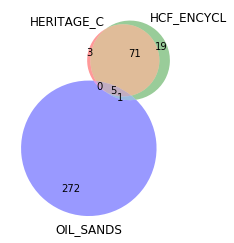

In [16]:
compare1 = Compare(collection_var[-1], index=[19,18,12])
print("Links that all collections have in common: \n\n" + ', '.join(compare1.V3_ABC)) 
print("\n\n")
print("Links that the HCF collections have in common: \n\n" + ', '.join(compare1.V3_AB))


Let's remove the HCF collections.  This means we have much less differentiation among the collections, but we'll be able to see some of the differences more clearly.

['HEALTH_SCI', 'EDUCATION_', 'WEBARCHIVE', 'PRAIRIE_PR']
[  2.45997813e-01   1.42852568e-01   1.14147638e-04]


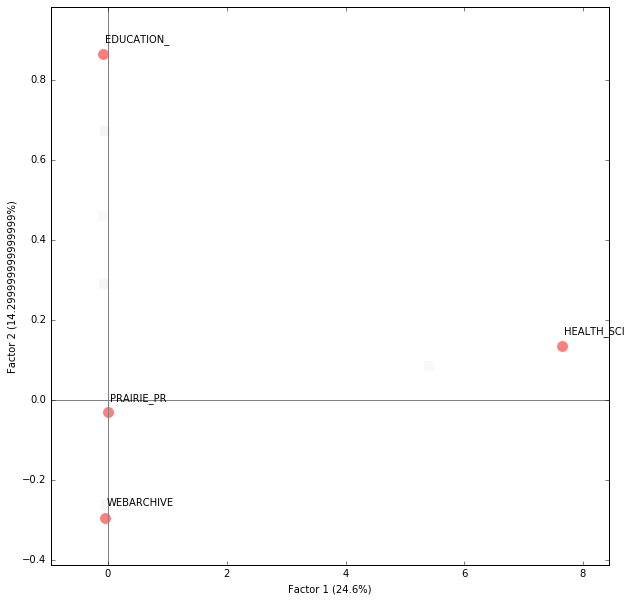

In [20]:
Compare(collection_var2[-5]) #2012

In [ ]:
Compare(collection_var2[-4]) #2013

['FLOODS_201', 'HUMANITIES', 'FRANCOPHON', 'WEBARCHIVE', 'HEALTH_SCI', 'ENERGY_ENV', 'IDLENOMORE', 'BUSINESS_G', 'EDUCATION_', 'PRAIRIE_PR']


In [ ]:
Compare (collection_var2[-3])#2014

In [ ]:
Compare(collection_var2[-2]) #2015

In [ ]:
Compare(collection_var2[-1]) #2016

In [ ]:
TestDict1 = {'2009': {'c1': {'lk1', 'lk2', 'lk3'},
                     'c2': {'lk1', 'lk10', 'lk20', 'lk2'},
                     'c3': {'lk3', 'lk10', 'lk33', 'lk4'}},
            '2010': {'c1': {'lk3', 'lk5', 'lk6'},
                    'c3': {'lk10', 'lk9', 'lk7'}},
            '2011': {'c1': {'lk3', 'lk5', 'lk6'},
                    'c4': {'lk1', 'lk2', 'lk3'}},
            '2012': {'c1': {'lk1', 'lk99', 'lk6'}}
           }

#print(list(zip(*zip(TestDict['2009'])))